In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as kpss
import warnings
warnings.filterwarnings("ignore")

# Создаем массивы данных

In [7]:
arr1 =  np.random.normal(0,1,100)
arr2 =  np.random.normal(0,10,100) + np.arange(0, 100, 1)

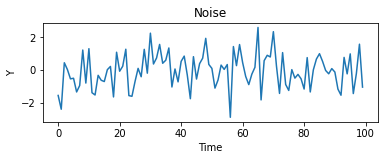

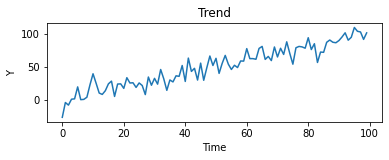

In [8]:
t = np.arange(0, 100, 1)
plt.subplot(2,1,1)
plt.plot(t, arr1)
plt.title('Noise')
plt.ylabel('Y')
plt.xlabel('Time')
plt.show()

plt.subplot(2,1,2)
plt.plot(t, arr2)
plt.title('Trend')
plt.ylabel('Y')
plt.xlabel('Time')
plt.show()

# Критерий kpss

In [9]:
print('p_value', sm.tsa.stattools.kpss(arr1, regression='c')[1])
print('p_value', sm.tsa.stattools.kpss(arr2, regression='c')[1])

p_value 0.1
p_value 0.01


# Считываем ряд с подневными оборотам в магазине

In [95]:
df = pd.read_csv('spending_by_day-1-d1d43b91-4e98-4840-96d2-2b83a805e25a.csv')
df['data'] = df.data.apply(lambda x: x[0:10])
df['data'] = pd.to_datetime(df.data, errors='coerce')
df.set_index('data', inplace=True)
df

,sum
data,
2018-01-01,1.897892e+06
2018-01-02,5.438664e+06
2018-01-03,5.628547e+06
2018-01-04,6.056366e+06
2018-01-05,6.064084e+06
...,...
2019-12-27,1.509453e+07
2019-12-28,1.920698e+07
2019-12-29,1.791994e+07


<AxesSubplot:xlabel='data'>

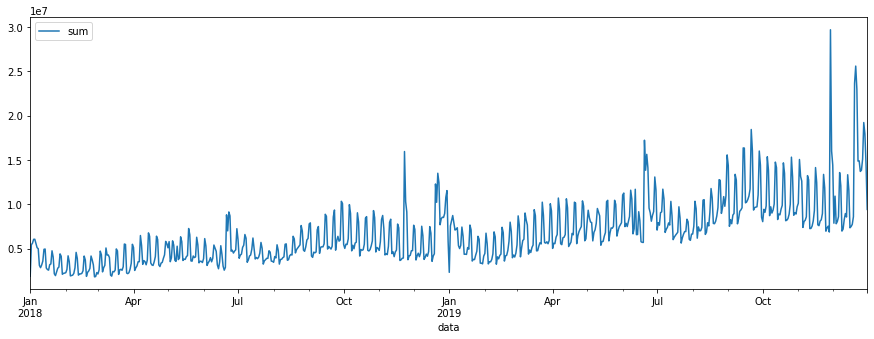

In [12]:
df.plot(figsize=(15,5))

# Посмотрим на Автокорреляцию и частичную автокорреляцию

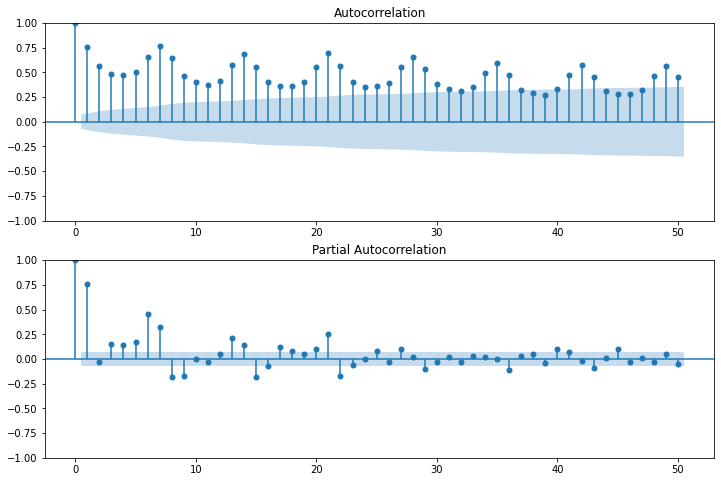

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=50, ax=ax2)

# Обучаем модели ARIMA и SARIMAX

In [87]:
src_data_model = df[:'2019-11-01']
src_data_model
model_arima = sm.tsa.ARIMA(src_data_model, order=(6, 1, 3)).fit()

model_sarima = sm.tsa.SARIMAX(src_data_model, order=(6, 1, 6), seasonal_order=(5, 1, 6, 7)).fit()

KeyboardInterrupt: 

In [ ]:
model_sarima.summary()

# Делаем предсказания

In [25]:
pred_arima = model_arima.predict('2019-12-01','2020-02-01', typ='levels')
pred_sarima = model_sarima.predict('2019-12-01','2020-02-01', typ='levels')

<AxesSubplot:xlabel='data'>

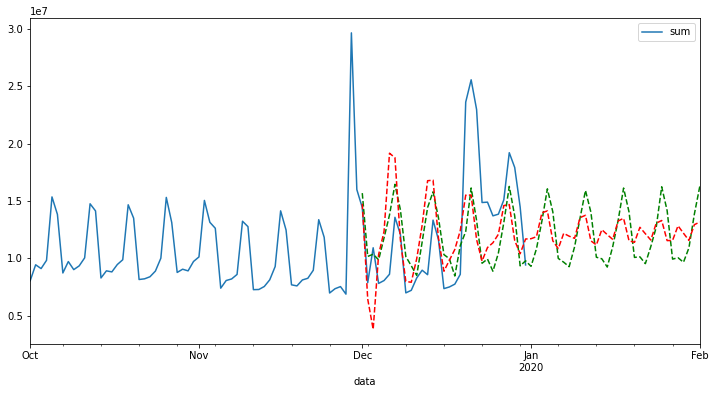

In [26]:
#df.plot(figsize=(12,6))
df['2019-10-01':].plot(figsize=(12,6))
pred_sarima.plot(style='g--')
pred_arima.plot(style='r--')

# Домашнее задание

Проведите изначальную предобработку

Попробую сначала сделать пре-е бокса-кокса (я эксперементировал с разными лямбдами, но оптимаьное значение показал ~1)

,sum
data,
2018-01-01,1.800995e+12
2018-01-02,1.478953e+13
2018-01-03,1.584026e+13
2018-01-04,1.833978e+13
2018-01-05,1.838655e+13
...,...
2019-10-28,3.841439e+13
2019-10-29,4.093236e+13
2019-10-30,3.963486e+13


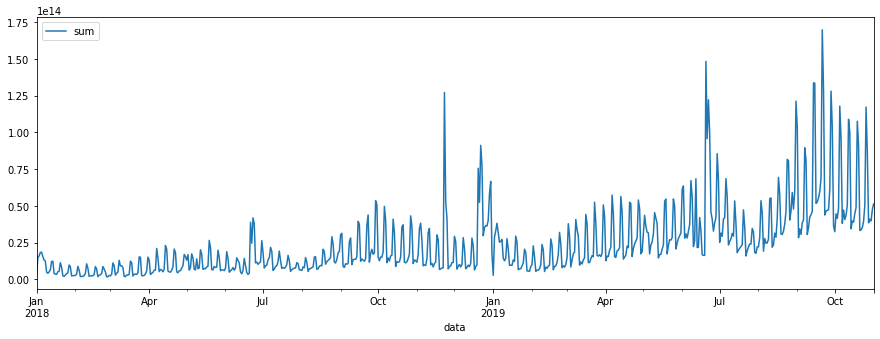

In [93]:
import scipy as sp
src_data_model_bc = src_data_model
src_data_model_bc['sum'] = sp.stats.boxcox(src_data_model_bc['sum'], lmbda = 2)
src_data_model_bc.plot(figsize=(15,5))
src_data_model

In [96]:
src_data_model = df[:'2019-11-01']
print('p_value', sm.tsa.stattools.kpss(src_data_model_bc['sum'], regression='c')[1]) 
df[:'2019-12-01']


p_value 0.01


,sum
data,
2018-01-01,1.897892e+06
2018-01-02,5.438664e+06
2018-01-03,5.628547e+06
2018-01-04,6.056366e+06
2018-01-05,6.064084e+06
...,...
2019-11-27,7.532315e+06
2019-11-28,6.875059e+06
2019-11-29,2.965701e+07


Не получилось сделать стационарный ряд. Попробуем продифф-вать один раз:

In [97]:
src_data_model_diff = src_data_model
src_data_model_diff = src_data_model_diff.diff(periods=1).dropna()

p_value 0.1


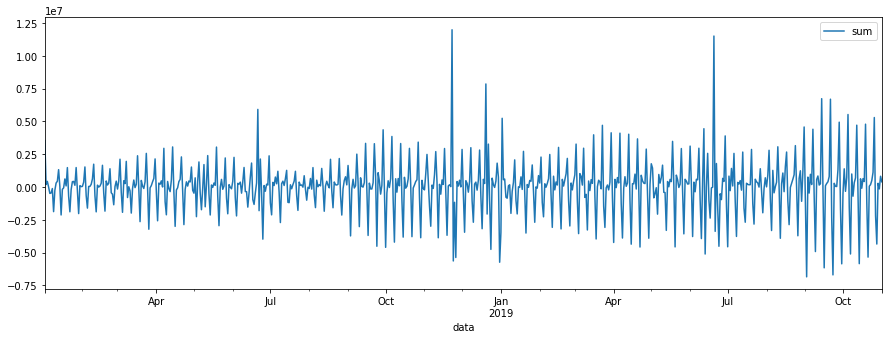

In [99]:
src_data_model_diff.plot(figsize=(15,5))
print('p_value', sm.tsa.stattools.kpss(src_data_model_diff['sum'], regression='c')[1]) 

Ура! Получилось. Тогда d = 1.

Определите каике d и D надо взять

Честно, я не совсем понял какое D нужно взять. Попробовал с 1 и 2-й. С 2-й картина получше.
Так же я изменил другие параметры. 

Подберите наулучшую модель из класса ARIMA

In [140]:
#Ваш код здесь 
model_arima = sm.tsa.ARIMA(src_data_model, order=(6, 1, 6)).fit()

model_sarima = sm.tsa.SARIMAX(src_data_model, order=(6, 1, 6), seasonal_order=(7, 2, 5, 7), enforce_stationarity=False).fit()

<AxesSubplot:xlabel='data'>

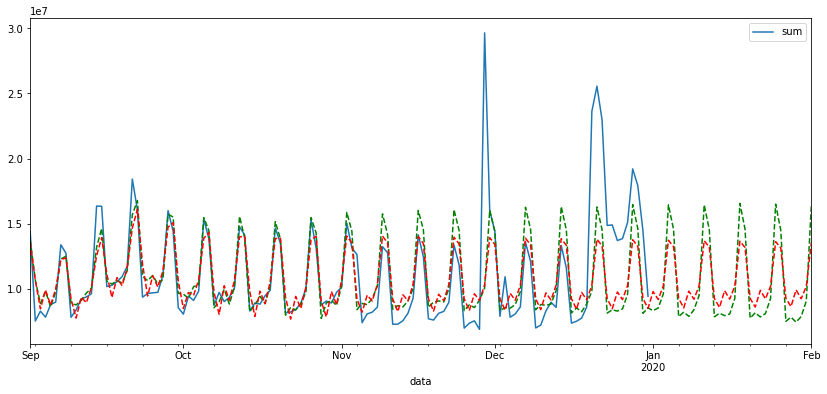

In [141]:
pred_arima = model_arima.predict('2018-10-01','2020-02-01', typ='levels')
pred_sarima = model_sarima.predict('2018-10-01','2020-02-01', typ='levels')
#df.plot(figsize=(12,6))
df['2019-09-01':].plot(figsize=(14,6))
pred_sarima['2019-09-01':].plot(style='g--')
pred_arima['2019-09-01':].plot(style='r--')

Для обучения возьмиет период до '2020-01-01. Выведете график полученных предсказаний с '2020-01-01' и реальных значение всего ряда

In [ ]:
#Ваш код здесь

Посмотрите на получившиеся ошибки. Что вы думаете о них.

In [142]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                            
=======================================================================================================
Dep. Variable:                                             sum   No. Observations:                  670
Model:             SARIMAX(6, 1, 6)x(7, 2, [1, 2, 3, 4, 5], 7)   Log Likelihood               -9458.683
Date:                                         Wed, 22 Dec 2021   AIC                          18967.366
Time:                                                 23:28:25   BIC                          19077.289
Sample:                                             01-01-2018   HQIC                         19010.157
                                                  - 11-01-2019                                         
Covariance Type:                                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7472      1.393     -0.536      0.592      -3.478       1.983
ar.L2         -0.7769      1.766     -0.440      0.660      -4.238       2.684
ar.L3         -0.2221      2.360     -0.094      0.925      -4.848       4.404
ar.L4         -0.2034      2.375     -0.086      0.932      -4.858       4.451
ar.L5         -0.0403      2.013     -0.020      0.984      -3.986       3.906
ar.L6         -0.3055      0.775     -0.394      0.693      -1.824       1.213
ma.L1          0.3446      1.394      0.247      0.805      -2.387       3.077
ma.L2          0.3016      1.359      0.222      0.824      -2.363       2.966
ma.L3         -0.2670      1.803     -0.148      0.882      -3.800       3.266
ma.L4         -0.1036      1.790     -0.058      0.954      -3.612       3.405
ma.L5         -0.1139      1.405     -0.081      0.935      -2.867       2.639
ma.L6          0.1973      1.191      0.166      0.868      -2.136       2.531
ar.S.L7       -2.3366      2.391     -0.977      0.328      -7.022       2.349
ar.S.L14      -2.5390      3.803     -0.668      0.504      -9.993       4.915
ar.S.L21      -1.4637      3.700     -0.396      0.692      -8.716       5.788
ar.S.L28      -0.4770      2.148     -0.222      0.824      -4.686       3.732
ar.S.L35      -0.3157      1.472     -0.214      0.830      -3.201       2.569
ar.S.L42      -0.2493      0.971     -0.257      0.797      -2.152       1.653
ar.S.L49      -0.0866      0.424     -0.204      0.838      -0.919       0.745
ma.S.L7        0.3253      2.402      0.135      0.892      -4.383       5.034
ma.S.L14      -0.8901      1.254     -0.710      0.478      -3.349       1.569
ma.S.L21      -0.9837      1.270     -0.775      0.438      -3.472       1.505
ma.S.L28       0.0865      1.621      0.053      0.957      -3.090       3.263
ma.S.L35       0.5814      1.565      0.372      0.710      -2.486       3.649
sigma2      6.253e+12   1.73e-11   3.62e+23      0.000    6.25e+12    6.25e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             23364.38
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                             3.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.68e+38. Standard errors may be unstable.
"""

In [143]:
#Ваше мнение о получившейся модели и остатках P.S. Переделайте параграф в marckdown

Получилось уменьшить ошибку AIC.